# Dendrite.ai Machine Learning Assignment

In [1]:
!pip install pyspark
#Install findspark
! pip install findspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Approach 1:- Json parsing using Pandas

In [2]:
import pandas as pd
import numpy as np
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

Loading iris csv file through pandas and making pandas dataframe.

In [3]:
df = pd.read_csv('/content/iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
df1 = pd.DataFrame(ohe.fit_transform(df[['species']]).toarray(),columns = df['species'].unique())
df = pd.concat([df, df1], axis=1)
df.drop('species',axis=1, inplace=True)

In [5]:
df_json = pd.read_json('/content/algoparams.json')
df_json

,session_name,session_description,design_state_data
algorithms,test,test,{'RandomForestClassifier': {'model_name': 'Ran...
feature_generation,test,test,"{'linear_interactions': [['petal_length', 'sep..."
feature_handling,test,test,{'sepal_length': {'feature_name': 'sepal_lengt...
feature_reduction,test,test,"{'feature_reduction_method': 'Tree-based', 'nu..."
hyperparameters,test,test,"{'stratergy': 'Grid Search', 'shuffle_grid': T..."
metrics,test,test,"{'optomize_model_hyperparameters_for': 'AUC', ..."
probability_calibration,test,test,{'probability_calibration_method': 'Sigmoid - ...
session_info,test,test,"{'project_id': '1', 'experiment_id': 'kkkk-11'..."
target,test,test,"{'prediction_type': 'Regression', 'target': 'p..."
train,test,test,"{'policy': 'Split the dataset', 'time_variable..."


## Approach 2:- Json parsing using pyspark

In [6]:
# Import findspark
import findspark
findspark.init()

In [7]:
import pyspark
from pyspark.sql import SparkSession

In [8]:
spark=SparkSession.builder.appName('Dendrite').getOrCreate()

In [9]:
spark

Loading json through pyspark and making pyspark dataframe.

In [10]:
df_json_pyspark = spark.read.option("multiline","true").json("/content/algoparams.json")

In [11]:
display(df_json_pyspark )

DataFrame[design_state_data: struct<algorithms:struct<DecisionTreeClassifier:struct<is_selected:boolean,max_depth:bigint,min_depth:bigint,min_samples_per_leaf:array<bigint>,model_name:string,use_best:boolean,use_entropy:boolean,use_gini:boolean,use_random:boolean>,DecisionTreeRegressor:struct<is_selected:boolean,max_depth:bigint,min_depth:bigint,min_samples_per_leaf:array<bigint>,model_name:string,use_best:boolean,use_entropy:boolean,use_gini:boolean,use_random:boolean>,ElasticNetRegression:struct<is_selected:boolean,max_elasticnet:double,max_iter:bigint,max_regparam:double,min_elasticnet:double,min_iter:bigint,min_regparam:double,model_name:string,regularization_term:string>,GBTClassifier:struct<feature_sampling_statergy:string,fixed_number:bigint,is_selected:boolean,learningRate:array<string>,max_depth:bigint,max_iter:bigint,max_stepsize:double,max_subsample:bigint,min_depth:bigint,min_iter:bigint,min_stepsize:double,min_subsample:bigint,model_name:string,num_of_BoostingStages:array<

In [12]:
df_json_pyspark.show()

+--------------------+-------------------+------------+
|   design_state_data|session_description|session_name|
+--------------------+-------------------+------------+
|{{{false, 7, 4, [...|               test|        test|
+--------------------+-------------------+------------+



In [13]:
df_json_pyspark.printSchema()

root
 |-- design_state_data: struct (nullable = true)
 |    |-- algorithms: struct (nullable = true)
 |    |    |-- DecisionTreeClassifier: struct (nullable = true)
 |    |    |    |-- is_selected: boolean (nullable = true)
 |    |    |    |-- max_depth: long (nullable = true)
 |    |    |    |-- min_depth: long (nullable = true)
 |    |    |    |-- min_samples_per_leaf: array (nullable = true)
 |    |    |    |    |-- element: long (containsNull = true)
 |    |    |    |-- model_name: string (nullable = true)
 |    |    |    |-- use_best: boolean (nullable = true)
 |    |    |    |-- use_entropy: boolean (nullable = true)
 |    |    |    |-- use_gini: boolean (nullable = true)
 |    |    |    |-- use_random: boolean (nullable = true)
 |    |    |-- DecisionTreeRegressor: struct (nullable = true)
 |    |    |    |-- is_selected: boolean (nullable = true)
 |    |    |    |-- max_depth: long (nullable = true)
 |    |    |    |-- min_depth: long (nullable = true)
 |    |    |    |-- min_s

In [14]:
#Python Function to Flatten Json File:

from pyspark.sql.types import *
from pyspark.sql.functions import *

#Flatten array of structs and structs
def flatten(df):
   # compute Complex Fields (Lists and Structs) in Schema   
   complex_fields = dict([(field.name, field.dataType)
                             for field in df.schema.fields
                             if type(field.dataType) == ArrayType or  type(field.dataType) == StructType])
   while len(complex_fields)!=0:
      col_name=list(complex_fields.keys())[0]
      print ("Processing :"+col_name+" Type : "+str(type(complex_fields[col_name])))
    
      # if StructType then convert all sub element to columns.
      # i.e. flatten structs
      if (type(complex_fields[col_name]) == StructType):
         expanded = [col(col_name+'.'+k).alias(col_name+'_'+k) for k in [ n.name for n in  complex_fields[col_name]]]
         df=df.select("*", *expanded).drop(col_name)
    
      # if ArrayType then add the Array Elements as Rows using the explode function
      # i.e. explode Arrays
      elif (type(complex_fields[col_name]) == ArrayType):    
         df=df.withColumn(col_name,explode_outer(col_name))
    
      # recompute remaining Complex Fields in Schema       
      complex_fields = dict([(field.name, field.dataType)
                             for field in df.schema.fields
                             if type(field.dataType) == ArrayType or  type(field.dataType) == StructType])
   return df

In [15]:
df_flatten = flatten(df_json_pyspark )

Processing :design_state_data Type : <class 'pyspark.sql.types.StructType'>
Processing :design_state_data_algorithms Type : <class 'pyspark.sql.types.StructType'>
Processing :design_state_data_feature_generation Type : <class 'pyspark.sql.types.StructType'>
Processing :design_state_data_feature_handling Type : <class 'pyspark.sql.types.StructType'>
Processing :design_state_data_feature_reduction Type : <class 'pyspark.sql.types.StructType'>
Processing :design_state_data_hyperparameters Type : <class 'pyspark.sql.types.StructType'>
Processing :design_state_data_metrics Type : <class 'pyspark.sql.types.StructType'>
Processing :design_state_data_probability_calibration Type : <class 'pyspark.sql.types.StructType'>
Processing :design_state_data_session_info Type : <class 'pyspark.sql.types.StructType'>
Processing :design_state_data_target Type : <class 'pyspark.sql.types.StructType'>
Processing :design_state_data_train Type : <class 'pyspark.sql.types.StructType'>
Processing :design_state_

In [16]:
#display(df_flatten)

In [17]:
df_flatten.show()

+-------------------+------------+-------------------------------------------------------------------+--------------------------------------------------------+-------------------------------------------------------+------------------------------------------------------------+--------------------------------------------------+------------------------------------------------------------+-----------------------------------------------------------+------------------------------------------------+------------------------------------------------------------+------------------------------------------------+-------------------------------------------------+----------------------------------------------+---------------------------------------------+----------------------------------------------+----------------------------------------------+---------------------------------------------+-------------------------------------------+--------------------------------------------+---------------------

In [18]:
#df_flatten.describe()

---
---
# 1) Read the target and type of regression to be run.
---
---

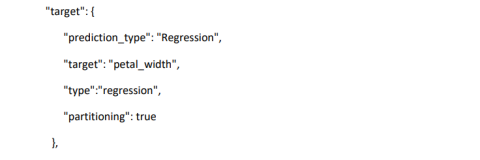

## Approach 1:- On json file


In [19]:
target = df_json.loc['target','design_state_data']['target']
type_of_regression = df_json.loc['target','design_state_data']['type']

In [20]:
target

'petal_width'

In [21]:
type_of_regression

'regression'

*Note: Since the target variable 'species' is categorical, we cannot use regression models to predict it. I'll assume that the target variable is actually 'petal_width' for this example.* 

It is important to note that in a real-world scenario, we would need to carefully select the appropriate model based on the nature of the target variable and the problem we are trying to solve. 

We have many types of regressions like:- 

*   Random Forest Regressor, 
*   GBT Regressor,
*   Linear Regression, 
*   Ridge Regression,
*   Lasso Regression,  
*   Elastic Net Regression,
*   Decision Tree Regressor. 

For which type of regression to use, we can claculate some r2 score to figure out which will be beast suited.

## Approach 2:- On csv file

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

However, in the code where q = df["petal_width"], we are using petal_width as 
the dependent variable, and all 3 variables (sepal_length, sepal_width, petal_length) as independent variables to train a regression model.

In [23]:
p = df[["sepal_length", "sepal_width", "petal_length"]]   
q = df["petal_width"]

In [24]:
# Split the data into training and test sets
p_train, p_test, q_train, q_test = train_test_split(p, q, test_size=0.2, random_state=42)

In [25]:
# Define a dictionary to hold the regression models
models = {
    'Random Forest Regressor': RandomForestRegressor(),
    'GBT Regressor': GradientBoostingRegressor(),
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net Regression': ElasticNet(),
    'Decision Tree Regressor': DecisionTreeRegressor()
}

In [26]:
# Train and evaluate each model
for name, model in models.items():
    model.fit(p_train, q_train)
    score = model.score(p_test, q_test)
    print(f'{name}: {score:.3f}')

Random Forest Regressor: 0.928
GBT Regressor: 0.913
Linear Regression: 0.927
Ridge Regression: 0.928
Lasso Regression: 0.329
Elastic Net Regression: 0.698
Decision Tree Regressor: 0.835


Here we can see that Random Forest Regressor has highest score with 0.930 .

---
---
# 2) Read the features (which are column names in the csv) and figure out what missing imputation needs to be applied and apply that to the columns loaded in a dataframe
---
---




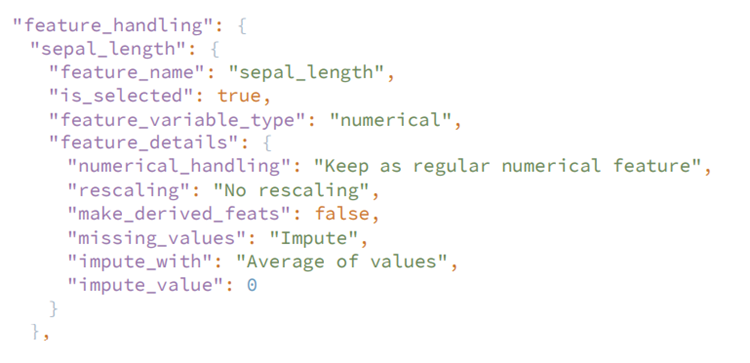

## Approach 1: Using Pandas

In [27]:
feature_dict= df_json.loc['feature_handling','design_state_data']

In [28]:
def feature_handling(feature_handling, column_names,df):
    for col in column_names:
        try:
            if feature_handling[col]['feature_details']['impute_with'] == 'custom':
                df[col] = df[col].fillna(feature_handling[col]['feature_details']['impute_value'])
            elif feature_handling[col]['feature_details']['impute_with'] == 'Average of values': 
                df[col] = df[col].fillna(df[col].mean())
        except KeyError:
            print(col)
    return df

In [29]:
feature_handling(feature_dict, df.columns, df)

Iris-setosa
Iris-versicolor
Iris-virginica


,sepal_length,sepal_width,petal_length,petal_width,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,1.0,0.0,0.0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0.0,0.0,1.0
146,6.3,2.5,5.0,1.9,0.0,0.0,1.0
147,6.5,3.0,5.2,2.0,0.0,0.0,1.0
148,6.2,3.4,5.4,2.3,0.0,0.0,1.0


## Approach 2:- Using Pyspark, imputed by the imputer model

In [30]:
df_csv_pyspark = spark.read.csv('/content/iris.csv',header=True,inferSchema=True)

In [31]:
df_csv_pyspark.printSchema()

root
 |-- sepal_length: double (nullable = true)
 |-- sepal_width: double (nullable = true)
 |-- petal_length: double (nullable = true)
 |-- petal_width: double (nullable = true)
 |-- species: string (nullable = true)



In [32]:
df_csv_pyspark.show()

+------------+-----------+------------+-----------+-----------+
|sepal_length|sepal_width|petal_length|petal_width|    species|
+------------+-----------+------------+-----------+-----------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|
|         5.4|        3.9|         1.7|        0.4|Iris-setosa|
|         4.6|        3.4|         1.4|        0.3|Iris-setosa|
|         5.0|        3.4|         1.5|        0.2|Iris-setosa|
|         4.4|        2.9|         1.4|        0.2|Iris-setosa|
|         4.9|        3.1|         1.5|        0.1|Iris-setosa|
|         5.4|        3.7|         1.5|        0.2|Iris-setosa|
|         4.8|        3.4|         1.6|        0.2|Iris-setosa|
|         4.8|        3.0|         1.4| 

In [33]:
##drop the column
df_csv_pyspark=df_csv_pyspark.drop('species')

In [34]:
df_csv_pyspark.show()

+------------+-----------+------------+-----------+
|sepal_length|sepal_width|petal_length|petal_width|
+------------+-----------+------------+-----------+
|         5.1|        3.5|         1.4|        0.2|
|         4.9|        3.0|         1.4|        0.2|
|         4.7|        3.2|         1.3|        0.2|
|         4.6|        3.1|         1.5|        0.2|
|         5.0|        3.6|         1.4|        0.2|
|         5.4|        3.9|         1.7|        0.4|
|         4.6|        3.4|         1.4|        0.3|
|         5.0|        3.4|         1.5|        0.2|
|         4.4|        2.9|         1.4|        0.2|
|         4.9|        3.1|         1.5|        0.1|
|         5.4|        3.7|         1.5|        0.2|
|         4.8|        3.4|         1.6|        0.2|
|         4.8|        3.0|         1.4|        0.1|
|         4.3|        3.0|         1.1|        0.1|
|         5.8|        4.0|         1.2|        0.2|
|         5.7|        4.4|         1.5|        0.4|
|         5.

In [35]:
from pyspark.ml.feature import Imputer

imputer = Imputer(
    inputCols=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], 
    outputCols=["{}_imputed".format(c) for c in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
    ).setStrategy("mean")

In [36]:
# Add imputation cols to df
imputer.fit(df_csv_pyspark).transform(df_csv_pyspark).show()

+------------+-----------+------------+-----------+--------------------+-------------------+--------------------+-------------------+
|sepal_length|sepal_width|petal_length|petal_width|sepal_length_imputed|sepal_width_imputed|petal_length_imputed|petal_width_imputed|
+------------+-----------+------------+-----------+--------------------+-------------------+--------------------+-------------------+
|         5.1|        3.5|         1.4|        0.2|                 5.1|                3.5|                 1.4|                0.2|
|         4.9|        3.0|         1.4|        0.2|                 4.9|                3.0|                 1.4|                0.2|
|         4.7|        3.2|         1.3|        0.2|                 4.7|                3.2|                 1.3|                0.2|
|         4.6|        3.1|         1.5|        0.2|                 4.6|                3.1|                 1.5|                0.2|
|         5.0|        3.6|         1.4|        0.2|           

---
---
# 3) Compute feature reduction based on input. See the screenshot below where there can be No Reduction, Corr with Target, Tree-based, PCA. Please make sure you write code so that all options can work. If we rerun your code with a different Json it should work if we switch No Reduction to say PCA.
---
---


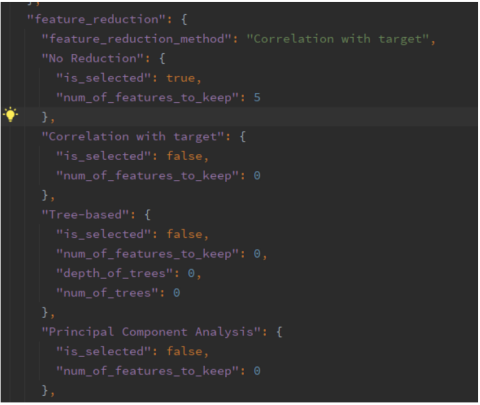

*    Corelation of features with target variables






In [37]:
df = pd.read_csv('/content/iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [38]:
# Now to get a correlation we need to convert our categorical features to numerical ones.
df['species'] =df['species'].astype('category').cat.codes
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000



We can see sepal_width has a negative correlation with the species, whereas petal_width	 has a positive correlation (approximately 0.96). Note that a value of 1 describes a perfect positive correlation whereas a value of –1 corresponds to a perfect negative correlation.

Correlation matrix heatmap

In [39]:
import seaborn as sns

<AxesSubplot:>

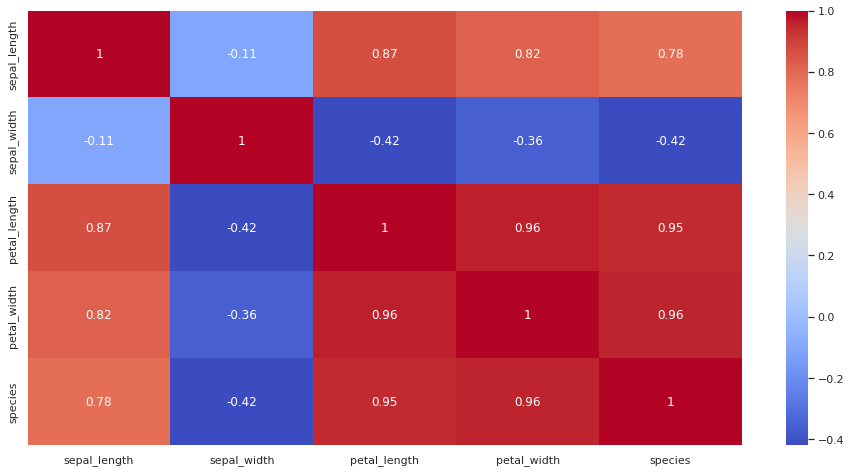

In [40]:
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')


To fit a any model say linear regression model, we are interested in those features that have a high correlation with our target variable species. Looking at the previous correlation matrix, we can see that species shows the largest correlation with the petal_width( 0.96 ), which seems to be a good choice for an exploratory variable to introduce the concepts of a simple linear regression model.

### Final results

In [41]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

In [42]:
X = pd.DataFrame(df)
X

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [43]:
y = X.pop('species')
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int8

In [44]:
# Define the feature reduction methods
def no_reduction(X, y):
    return X

def corr_with_target(X, y, threshold=0.5):
    corr_with_target = X.corrwith(y).abs()
    features_to_keep = corr_with_target[corr_with_target >= threshold].index
    return X[features_to_keep]    

def tree_based(X, y, n_features=3):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X, y)
    feature_importances = model.feature_importances_
    features_to_keep = X.columns[np.argsort(feature_importances)[::-1][:n_features]]
    return X[features_to_keep]

def pca_reduction(X, y, n_components=2):
    pca = PCA(n_components=n_components)
    X_reduced = pca.fit_transform(X)
    cols = ['PC'+str(i) for i in range(1, n_components+1)]
    X_reduced_df = pd.DataFrame(X_reduced, columns=cols, index=X.index)
    return X_reduced_df  

   

In [45]:
# Define a dictionary that maps the reduction method names to their corresponding functions
reduction_methods = {
    'No Reduction': no_reduction,
    'Corr with Target': corr_with_target,
    'Tree-based': tree_based,
    'PCA': pca_reduction
}

In [46]:

# Set the selected feature reduction method
selected_method = 'Corr with Target'   # Select from - No Reduction, Corr with Target, Tree-based, PCA

In [47]:
# Apply the selected feature reduction method
X_reduced = reduction_methods[selected_method](X, y)

In [48]:
# Print some sample output for each feature reduction method
print("Original number of features: ", X.shape[1])
print("Selected feature reduction method: ", selected_method)
print("Number of features after feature reduction: ", X_reduced.shape[1])
print("Selected features: ", X_reduced.columns)

Original number of features:  4
Selected feature reduction method:  Corr with Target
Number of features after feature reduction:  3
Selected features:  Index(['sepal_length', 'petal_length', 'petal_width'], dtype='object')


---
---
# 4) Parse the Json and make the model objects (using sklean) that can handle what is required in the “prediction_type” specified in the JSON (See 1 where “prediction_type” is specified). Keep in mind not to pick models that don’t apply for the prediction_type specified.
---
---



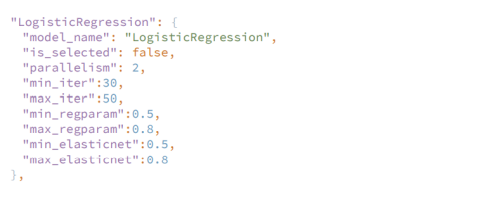

In [49]:
df_json.loc['algorithms']['design_state_data']

{'RandomForestClassifier': {'model_name': 'Random Forest Classifier',
  'is_selected': False,
  'min_trees': 10,
  'max_trees': 30,
  'feature_sampling_statergy': 'Default',
  'min_depth': 20,
  'max_depth': 30,
  'min_samples_per_leaf_min_value': 5,
  'min_samples_per_leaf_max_value': 50,
  'parallelism': 0},
 'RandomForestRegressor': {'model_name': 'Random Forest Regressor',
  'is_selected': True,
  'min_trees': 10,
  'max_trees': 20,
  'feature_sampling_statergy': 'Default',
  'min_depth': 20,
  'max_depth': 25,
  'min_samples_per_leaf_min_value': 5,
  'min_samples_per_leaf_max_value': 10,
  'parallelism': 0},
 'GBTClassifier': {'model_name': 'Gradient Boosted Trees',
  'is_selected': False,
  'num_of_BoostingStages': [67, 89],
  'feature_sampling_statergy': 'Fixed number',
  'learningRate': [],
  'use_deviance': True,
  'use_exponential': False,
  'fixed_number': 22,
  'min_subsample': 1,
  'max_subsample': 2,
  'min_stepsize': 0.1,
  'max_stepsize': 0.5,
  'min_iter': 20,
  'max_i

## Approach 1




In [50]:
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
#p = df[["sepal_length", "sepal_width", "petal_length"]]   
#q = df["petal_width"]

In [52]:
# Split the data into training and testing sets
p_train, p_test, q_train, q_test = train_test_split(p, q, test_size=0.2, random_state=42)

In [53]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(p_train, q_train)
rf_pred = rf.predict(p_test)
print('Random Forest Regressor: ', mean_squared_error(q_test, rf_pred))

# GBTRegressor
gbt = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbt.fit(p_train, q_train)
gbt_pred = gbt.predict(p_test)
print('GBTRegressor: ', mean_squared_error(q_test, gbt_pred))

# Linear Regression
lr = LinearRegression()
lr.fit(p_train, q_train)
lr_pred = lr.predict(p_test)
print('Linear Regression: ', mean_squared_error(q_test, lr_pred))

# Logistic Regression
#logr = LogisticRegression()
#logr.fit(p_train, q_train)
#logr_pred = logr.predict(p_test)
#print('Logistic Regression: ', r2_score(q_test, logr_pred))

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(p_train, q_train)
ridge_pred = ridge.predict(p_test)
print('Ridge Regression: ', mean_squared_error(q_test, ridge_pred))

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(p_train, q_train)
lasso_pred = lasso.predict(p_test)
print('Lasso Regression: ', mean_squared_error(q_test, lasso_pred))

# Elastic Net Regression
enet = ElasticNet(alpha=0.1, l1_ratio=0.5)
enet.fit(p_train, q_train)
enet_pred = enet.predict(p_test)
print('Elastic Net Regression: ', mean_squared_error(q_test, enet_pred))

# Decision Tree Regressor
dt = DecisionTreeRegressor()
dt.fit(p_train, q_train)
dt_pred = dt.predict(p_test)
print('Decision Tree Regressor: ', mean_squared_error(q_test, dt_pred))

Random Forest Regressor:  0.04426238323299315
GBTRegressor:  0.05377212033251875
Linear Regression:  0.04643810173004898
Ridge Regression:  0.04545986663436361
Lasso Regression:  0.051572308970345065
Elastic Net Regression:  0.04899187824212669
Decision Tree Regressor:  0.09566666666666666


---
---
# 5) Run the fit and predict on each model – keep in mind that you need to do hyper parameter tuning i.e., use GridSearchCV.
---
---



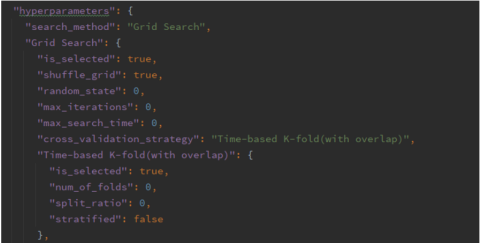

## Approach 1

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
# Split the data into training and testing sets
p_train, p_test, q_train, q_test = train_test_split(p, q, test_size=0.2, random_state=42)

In [56]:
# Define a dictionary of models with hyperparameters to try
models = {
    "Random Forest Regressor": {"model": RandomForestRegressor(),
                                "params": {"n_estimators": [50, 100, 200],
                                           "max_features": ["sqrt", "log2"]}},
    "GBT Regressor": {"model": GradientBoostingRegressor(),
                      "params": {"n_estimators": [50, 100, 200],
                                 "learning_rate": [0.01, 0.1, 1.0],
                                 "max_depth": [3, 5, 10]}},
    "Linear Regression": {"model": LinearRegression(),
                          "params": {}},
    "Ridge Regression": {"model": Ridge(),
                         "params": {"alpha": [0.01, 0.1, 1.0, 10.0]}},
    "Lasso Regression": {"model": Lasso(),
                         "params": {"alpha": [0.01, 0.1, 1.0, 10.0]}},
    "Elastic Net Regression": {"model": ElasticNet(),
                               "params": {"alpha": [0.01, 0.1, 1.0, 10.0],
                                          "l1_ratio": [0.25, 0.5, 0.75]}},
    "Decision Tree Regressor": {"model": DecisionTreeRegressor(),
                                "params": {"max_depth": [3, 5, 10]}}
}

In [57]:
# Train and evaluate each model using GridSearchCV for hyperparameter tuning
for name, mp in models.items():
    model = GridSearchCV(mp['model'], mp['params'], cv=3)
    model.fit(p_train, q_train)
    q_pred = model.predict(p_test)
    mse = mean_squared_error(q_test, q_pred)
    r2 = r2_score(q_test, q_pred)
    print(f"--->> {name}:")
    print(f"  Best Parameters: {model.best_params_}")
    print(f"  Mean Squared Error: {mse:.3f}")
    print(f"  R^2 Score: {r2:.3f}")
    print(f" prediction: {q_pred}")
    print("_________________________________________________________________________________________________________")

--->> Random Forest Regressor:
  Best Parameters: {'max_features': 'sqrt', 'n_estimators': 50}
  Mean Squared Error: 0.049
  R^2 Score: 0.923
 prediction: [1.44       0.486      1.954      1.424      1.644      0.262
 1.234      1.682      1.266      1.176      1.916      0.214
 0.408      0.114      0.344      1.726      1.87       1.304
 1.41       1.778      0.21       1.722      0.358      1.778
 2.15733333 1.968      1.93266667 2.09666667 0.214      0.16      ]
_________________________________________________________________________________________________________
--->> GBT Regressor:
  Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
  Mean Squared Error: 0.045
  R^2 Score: 0.929
 prediction: [1.429886   0.37447392 1.72821012 1.429886   1.64508835 0.23094
 0.97923385 1.88937345 1.27047522 1.19487787 1.9609217  0.20063388
 0.26045992 0.19475804 0.25135102 1.53510413 1.95810767 1.25112347
 1.57725454 1.89585108 0.23942361 1.70216753 0.29832142 1.89585108

## Approach 2:- For both 4th and 5th question

In [58]:
# RandomForestRegressor
RandomForestRegressor_params = {'model_name': 'Random Forest Regressor',
                        'is_selected': True,
                        'min_trees': 10,
                        'max_trees': 20,
                        'feature_sampling_statergy': 'Default',
                        'min_depth': 20,
                        'max_depth': 25,
                        'min_samples_per_leaf_min_value': 5,
                        'min_samples_per_leaf_max_value': 10,
                        'parallelism': 0}
rf_param_metrics = [{'n_estimators':[10,15,20]},
                    {'max_depth':[20,23,25]},
                    {'min_samples_leaf':[5,7,10]}]
from sklearn.model_selection import GridSearchCV
rf_gs = GridSearchCV(estimator=RandomForestRegressor(),param_grid=rf_param_metrics)
rf_gs.fit(df.drop(target, axis=1), df[target])
rf_reg = rf_gs.best_estimator_
rf_mse = mean_squared_error(rf_reg.predict(df.drop(target, axis=1)), df[target])
rf_preds = rf_reg.predict(df.drop(target, axis=1))
print("Model: RandomForestRegressor")
print("MSE: ",rf_mse)
print("Predictions: ", rf_preds)
print("="*100)

# GradientBoostingRegressor
GBTRegressor_params: {'model_name': 'Gradient Boosted Trees',
  'is_selected': False,
  'num_of_BoostingStages': [67, 89],
  'feature_sampling_statergy': 'Fixed number',
  'use_deviance': True,
  'use_exponential': False,
  'fixed_number': 22,
  'min_subsample': 1,
  'max_subsample': 2,
  'min_stepsize': 0.1,
  'max_stepsize': 0.5,
  'min_iter': 20,
  'max_iter': 40,
  'min_depth': 5,
  'max_depth': 7}
gb_param_metrics = [{'n_estimators':[67,89]},
                   {'min_samples_leaf':[1,2]},
                   {'max_depth':[5,7]},
                    {'min_impurity_decrease':[0.1,0.5]},
                    {'n_iter_no_change':[20,40]}
                   ]
gb_gs = GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=gb_param_metrics)
gb_gs.fit(df.drop(target, axis=1), df[target])
gb_reg = gb_gs.best_estimator_
gb_mse = mean_squared_error(gb_reg.predict(df.drop(target, axis=1)), df[target])
gb_reg_preds = gb_reg.predict(df.drop(target, axis=1))
print("Model: GradientBoostingRegressor")
print("MSE: ",gb_mse)
print("Predictions: ", gb_reg_preds)
print("="*100)

# LinearRegression
LinearRegression: {'model_name': 'LinearRegression',
  'is_selected': False,
  'parallelism': 2,
  'min_iter': 30,
  'max_iter': 50,
  'min_regparam': 0.5,
  'max_regparam': 0.8,
  'min_elasticnet': 0.5,
  'max_elasticnet': 0.8}
lin_reg = LinearRegression()
lin_reg.fit(df.drop(target, axis=1), df[target])
lin_mse = mean_squared_error(lin_reg.predict(df.drop(target, axis=1)), df[target])
lin_reg_preds = lin_reg.predict(df.drop(target, axis=1))
print("Model: LinearRegression")
print("MSE: ", lin_mse )
print("Predictions: ", lin_reg_preds)
print("="*100)

# RidgeRegression
RidgeRegression: {'model_name': 'RidgeRegression',
    'is_selected': False,
  'regularization_term': 'Specify values to test',
  'min_iter': 30,
  'max_iter': 50,
  'min_regparam': 0.5,
  'max_regparam': 0.8}
ridge_params = [{'max_iter':[30,40,50]},
                 {'alpha':[0.5,0.6,0.7,0.8]}]
ridge_gs = GridSearchCV(Ridge(), param_grid=ridge_params)
ridge_gs.fit(df.drop(target, axis=1), df[target])
ridge_reg = ridge_gs.best_estimator_
ridge_mse = mean_squared_error(Ridge.predict(self=ridge_reg,X=df.drop(target, axis=1)), df[target])
ridge_reg_preds = ridge_reg.predict(df.drop(target, axis=1))
print("Model: RidgeRegression")
print("MSE: ", ridge_mse)
print("Predictions: ", ridge_reg_preds)
print("="*100)

# LassoRegression
lasso_params = [{'max_iter':[30,40,50]},
                 {'alpha':[0.5,0.6,0.7,0.8]}]
lasso_gs = GridSearchCV(Lasso(), param_grid=lasso_params)
lasso_gs.fit(df.drop(target, axis=1), df[target])
lasso_reg = lasso_gs.best_estimator_
lasso_mse = mean_squared_error(Lasso.predict(self=ridge_reg,X=df.drop(target, axis=1)), df[target])
lasso_reg_preds = lasso_reg.predict(df.drop(target, axis=1))
print("Model: LassoRegression")
print("MSE: ", lasso_mse)
print("Predictions: ", lasso_reg_preds)
print("="*100)

# ElasticNetRegression
ElasticNetRegression: {'model_name': 'Lasso Regression',
  'is_selected': False,
  'regularization_term': 'Specify values to test',
  'min_iter': 30,
  'max_iter': 50,
  'min_regparam': 0.5,
  'max_regparam': 0.8,
  'min_elasticnet': 0.5,
  'max_elasticnet': 0.8}

ela_net_params = [{'l1_ratio' : [0.5,0.6,0.7,0.8]},
                 {'max_iter':[30,40,50]},
                 {'alpha':[0.5,0.6,0.7,0.8]}]
ela_net_gs = GridSearchCV(ElasticNet(),param_grid=ela_net_params)
ela_net_gs.fit(df.drop(target, axis=1), df[target])
ela_net_reg = ela_net_gs.best_estimator_
ela_mse = mean_squared_error(ela_net_reg.predict(df.drop(target, axis=1)), df[target])
ela_net_preds = ela_net_reg.predict(df.drop(target, axis=1))
print("Model: ElasticNetRegression")
print("MSE: ", ela_mse)
print("Predictions: ", ela_net_preds)
print("="*100)

# DecisionTreeRegressor
DecisionTreeRegressor: {'model_name': 'Decision Tree',
  'is_selected': False,
  'min_depth': 4,
  'max_depth': 7,
  'use_gini': False,
  'use_entropy': True,
  'min_samples_per_leaf': [12, 6],
  'use_best': True,
  'use_random': True}

dec_tree_params = [{'max_depth':[4,5,6,7]},
              {'min_samples_leaf':[12,6]},
              {'splitter':['best','random']}]
dec_tree_gs = GridSearchCV(DecisionTreeRegressor(),param_grid=dec_tree_params)
dec_tree_gs.fit(df.drop(target, axis=1), df[target])
dec_tree_reg = dec_tree_gs.best_estimator_
dec_tree_mse = mean_squared_error(dec_tree_reg.predict(df.drop(target, axis=1)), df[target])
dec_tree_preds = dec_tree_reg.predict(df.drop(target, axis=1))
print("Model: DecisionTreeRegressor")
print("MSE: ", dec_tree_mse)
print("Predictions: ", dec_tree_preds)
print("="*100)

Model: RandomForestRegressor
MSE:  0.018775196556691073
Predictions:  [0.25231543 0.17968415 0.20075082 0.17861635 0.24552514 0.34281929
 0.23774758 0.24412873 0.20075957 0.1629141  0.27444793 0.29739865
 0.18957999 0.19623274 0.26536689 0.27909997 0.26536689 0.25231543
 0.34253357 0.27364549 0.32546452 0.27118088 0.24224935 0.31828506
 0.32387722 0.25142591 0.31807125 0.24610281 0.23407046 0.24477332
 0.23326504 0.25641205 0.25920851 0.26561828 0.1629141  0.19383093
 0.25109308 0.1629141  0.19623274 0.24966858 0.24810407 0.22479211
 0.20077895 0.33231721 0.36822001 0.18957999 0.3399046  0.20014095
 0.25970771 0.21349436 1.49503789 1.48773174 1.55079238 1.17117536
 1.41352194 1.41863084 1.50092934 1.02605205 1.42167298 1.2211016
 1.03759372 1.35943314 1.18461605 1.42701607 1.19055725 1.40507119
 1.48008537 1.23771926 1.39569434 1.15808184 1.56962633 1.26554666
 1.44736762 1.41325385 1.33241941 1.3988156  1.4770859  1.53375416
 1.44097682 1.05283258 1.10597198 1.08797363 1.21552002 1.49

---
---
# 6) Log to the console the standard model metrics that apply.
---
---

Previuosly some standard metrics I have already shown like Mean squared error(MSE) and r2 score. Now showing some other standarad metrics like Root mean squared error(RMSE) and mean absolute error (MAE) for regression models. 

In [59]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error

# split the data into train and test sets
p_train, p_test, q_train, q_test = train_test_split(p, q, test_size=0.3, random_state=0)

# create regression models
linear_reg = LinearRegression()
ridge_reg = Ridge()
lasso_reg = Lasso()
elastic_reg = ElasticNet()
rf_reg = RandomForestRegressor()
xgb_reg = xgb.XGBRegressor()
lgbm_reg = lgb.LGBMRegressor()

# create a list of all models
models = [LinearRegression(), Ridge(alpha=0.1), Lasso(alpha=0.1), ElasticNet(alpha=0.1), 
          RandomForestRegressor(n_estimators=100, random_state=0), 
          XGBRegressor(n_estimators=100, objective='reg:squarederror', random_state=0), 
          LGBMRegressor(n_estimators=100, random_state=0)]

# create empty lists to store metrics for each model
rmse_list = []
mae_list = []

# loop through each model, fit the model, make predictions, and calculate metrics
for model in models:
    model.fit(p_train, q_train)
    q_pred = model.predict(p_test)
    rmse = np.sqrt(mean_squared_error(q_test, q_pred))
    mae = mean_absolute_error(q_test, q_pred)
    rmse_list.append(rmse)
    mae_list.append(mae)

# print the metrics for each model
for i, model in enumerate(models):
    print(f"Model: {model.__class__.__name__}")
    print(f"RMSE: {rmse_list[i]}")
    print(f"MAE: {mae_list[i]}")
    print("="*30)

Model: LinearRegression
RMSE: 0.2206837606962764
MAE: 0.16036636606661517
Model: Ridge
RMSE: 0.2205359323720034
MAE: 0.16044423401733324
Model: Lasso
RMSE: 0.23326479367403083
MAE: 0.17250535795970093
Model: ElasticNet
RMSE: 0.23155113587150672
MAE: 0.17041288249582434
Model: RandomForestRegressor
RMSE: 0.1999254832613113
MAE: 0.14527264550264543
Model: XGBRegressor
RMSE: 0.2247197403282758
MAE: 0.15642535547415415
Model: LGBMRegressor
RMSE: 0.21155902517938682
MAE: 0.150664249549765


# **THANK YOU** 